# **MNIST Dataset Image Classifier**
Dataset for this program is provided by kaggle:
https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

Within this notebook, I implemented a simple two-layered neural network using only Numpy. No other libraries like Tensorflow was used. The dataset used to train this neural-network is the MNIST dataset available in Kaggle through the link above.

Disclaimer:
Although the entirity of this file is self-coded, I want to credit Samson Zhang on the motivation of this notebook as a majority of the content within this notebook was based on his work. Below are links to find some of his work:
- https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras
- https://www.youtube.com/watch?v=w8yWXqWQYmU

## Initialization and Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_train = pd.read_csv('./mnist_train.csv')
m, n = data_train.shape

data_train = np.array(data_train).T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

## Defining Functions

In [2]:
# Helper functions
def init_params():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

# Activation Functions
def ReLU(Z):
  return np.maximum(Z, 0)

def deriv_ReLU(Z):
  return Z > 0

def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

# Hard coding Y for back propagation
def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

# Printing functions
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size

# Mathematical Functions
def forward_propagation(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  # Note that A2 here represents the output layer
  # We will extract this to get the prediction
  return Z1, A1, Z2, A2

# We don't really need Z2, but I just included to make all the function parameters uniform
def backward_propagation(Z1, A1, Z2, A2, W2, X, Y):
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = (1 / m) * dZ2.dot(A1.T)
  db2 = (1 / m) * np.sum(dZ2)
  
  dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
  dW1 = (1 / m) * dZ1.dot(X.T)
  db1 = (1 / m) * np.sum(dZ1)
  return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2


## Training the Neural Network Using Gradient Descent

In [3]:

def gradient_descent(X, Y, iterations, alpha):
  W1, b1, W2, b2 = init_params()
  for i in range(iterations + 1):
    Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W2, X, Y)
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if (i % 50 == 0):
      print("Iteration: ", i)
      print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
  return W1, b1, W2, b2


In [4]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1000, 0.1)

Iteration:  0
[2 2 2 ... 2 7 2] [5 0 4 ... 5 6 8]
Accuracy:  0.12141666666666667
Iteration:  50
[0 0 3 ... 7 9 7] [5 0 4 ... 5 6 8]
Accuracy:  0.49005
Iteration:  100
[0 0 8 ... 7 6 7] [5 0 4 ... 5 6 8]
Accuracy:  0.6560666666666667
Iteration:  150
[0 0 8 ... 7 6 0] [5 0 4 ... 5 6 8]
Accuracy:  0.7298666666666667
Iteration:  200
[3 0 8 ... 7 6 0] [5 0 4 ... 5 6 8]
Accuracy:  0.77
Iteration:  250
[3 0 8 ... 5 6 0] [5 0 4 ... 5 6 8]
Accuracy:  0.7943833333333333
Iteration:  300
[3 0 8 ... 5 6 0] [5 0 4 ... 5 6 8]
Accuracy:  0.8108666666666666
Iteration:  350
[3 0 8 ... 5 6 0] [5 0 4 ... 5 6 8]
Accuracy:  0.8235666666666667
Iteration:  400
[3 0 8 ... 5 6 0] [5 0 4 ... 5 6 8]
Accuracy:  0.8333333333333334
Iteration:  450
[3 0 8 ... 5 6 0] [5 0 4 ... 5 6 8]
Accuracy:  0.8408
Iteration:  500
[3 0 8 ... 5 6 0] [5 0 4 ... 5 6 8]
Accuracy:  0.8464333333333334
Iteration:  550
[3 0 8 ... 5 6 0] [5 0 4 ... 5 6 8]
Accuracy:  0.85155
Iteration:  600
[3 0 8 ... 5 6 0] [5 0 4 ... 5 6 8]
Accuracy:  0.8

## Testing the Accuracy of the Neural Network

In [90]:
# Testing Prediction Functions
def predict(X, W1, b1, W2, b2):
  _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
  prediction = get_predictions(A2)
  return prediction

def test_prediction(index, W1, b1, W2, b2):
  selected_image = X_train[:, index, None]
  prediction = predict(X_train[:, index, None], W1, b1, W2, b2)
  label = Y_train[index]
  print("Prediction: ", prediction)
  print("Label: ", label)
  
  selected_image = selected_image.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(selected_image, interpolation='nearest')
  plt.show()

Prediction:  [6]
Label:  6


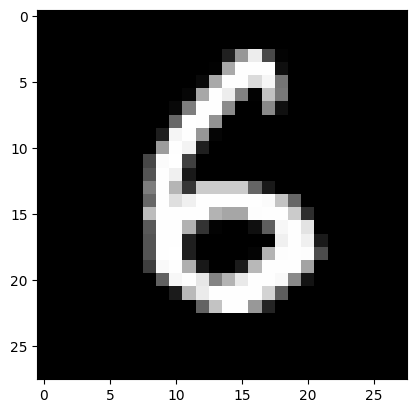

In [99]:
test_prediction(106, W1, b1, W2, b2)